In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
# Read dataset
df = pd.read_csv('dataset_task.csv', delimiter=";")
df

,Dateline (hari),Tingkat Important,Tingkat Urgent,Kompleksitas,Prioritas
0,0,important,urgent,tinggi,do it now
1,0,important,not urgent,sedang,schedule
2,0,not important,urgent,sedang,delegate
3,0,not important,not urgent,rendah,drop
4,1,important,urgent,tinggi,do it now
...,...,...,...,...,...
801,1,important,urgent,tinggi,do it now
802,0,important,urgent,tinggi,do it now
803,1,important,urgent,tinggi,do it now
804,0,important,urgent,tinggi,do it now


In [3]:
# Kamus untuk penerjemahan teks ke angka
translation_table = {'important': 0, 'not important': 1}
translation_table2 = {'urgent': 0, 'not urgent': 1}
translation_table3 = {'rendah': 0, 'sedang': 1, 'tinggi': 2}

# Menggunakan metode map untuk penerjemahan
df['Tingkat Important'] = df['Tingkat Important'].replace(translation_table)
df['Tingkat Urgent'] = df['Tingkat Urgent'].replace(translation_table2)
df['Kompleksitas'] = df['Kompleksitas'].replace(translation_table3)

In [4]:
df

,Dateline (hari),Tingkat Important,Tingkat Urgent,Kompleksitas,Prioritas
0,0,0,0,2,do it now
1,0,0,1,1,schedule
2,0,1,0,1,delegate
3,0,1,1,0,drop
4,1,0,0,2,do it now
...,...,...,...,...,...
801,1,0,0,2,do it now
802,0,0,0,2,do it now
803,1,0,0,2,do it now
804,0,0,0,2,do it now


In [5]:
feature =  df.drop(['Prioritas'],axis=1)
target = df['Prioritas'].values

In [6]:
# Encode target data using LabelEncoder
label_encoder = LabelEncoder()
target_data_encoded = label_encoder.fit_transform(target)

# Perform one-hot encoding on the encoded target data
target_data_encoded_onehot = tf.keras.utils.to_categorical(target_data_encoded, num_classes=4)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(feature, target_data_encoded_onehot, test_size=0.3, random_state=42)

# Build the model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(16, input_dim=4, activation='relu'))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(4, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=8, verbose=1)

# Predict on the test data
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
predicted_y = np.argmax(y_test, axis=1)

# Decode the predicted labels
predicted_labels_decoded = label_encoder.inverse_transform(predicted_labels)
y_target = label_encoder.inverse_transform(predicted_y)

# Generate classification report
report = classification_report(y_target, predicted_labels_decoded)
print("Classification Report:")
print(report)

Epoch 1/20
71/71 [==============================] - 6s 4ms/step - loss: 12.7224 - accuracy: 0.2713
Epoch 2/20
71/71 [==============================] - 0s 3ms/step - loss: 2.5897 - accuracy: 0.4965
Epoch 3/20
71/71 [==============================] - 0s 4ms/step - loss: 1.4273 - accuracy: 0.6117
Epoch 4/20
71/71 [==============================] - 0s 5ms/step - loss: 0.9781 - accuracy: 0.5851
Epoch 5/20
71/71 [==============================] - 0s 5ms/step - loss: 0.8262 - accuracy: 0.7340
Epoch 6/20
71/71 [==============================] - 0s 5ms/step - loss: 0.7616 - accuracy: 0.7748
Epoch 7/20
71/71 [==============================] - 0s 4ms/step - loss: 0.6362 - accuracy: 0.9291
Epoch 8/20
71/71 [==============================] - 0s 5ms/step - loss: 0.5606 - accuracy: 0.9699
Epoch 9/20
71/71 [==============================] - 0s 5ms/step - loss: 0.4917 - accuracy: 0.9699
Epoch 10/20
71/71 [==============================] - 0s 5ms/step - loss: 0.4437 - accuracy: 0.9947
Epoch 11/20
71/71 

In [7]:
# Calculate accuracy
accuracy = accuracy_score(y_target, predicted_labels_decoded)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 100.00%


In [8]:
# Generate classification report
report = classification_report(y_target, predicted_labels_decoded)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

    delegate       1.00      1.00      1.00        49
   do it now       1.00      1.00      1.00        22
        drop       1.00      1.00      1.00        57
    schedule       1.00      1.00      1.00       114

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242



In [9]:
# Compute confusion matrix
cm = confusion_matrix(y_target, predicted_labels_decoded)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 49   0   0   0]
 [  0  22   0   0]
 [  0   0  57   0]
 [  0   0   0 114]]


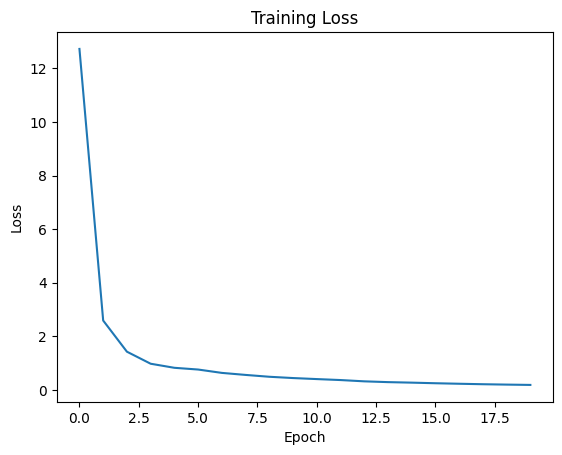

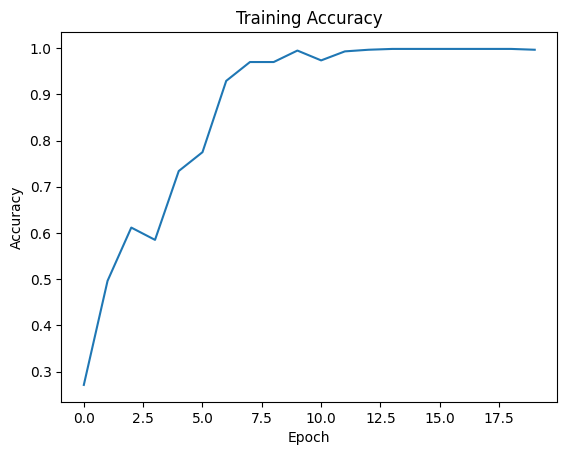

In [10]:
# Plot the training loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Plot the training accuracy
plt.plot(history.history['accuracy'])
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [11]:
model.save("model.h5")

In [12]:
loaded_model = tf.keras.models.load_model("model.h5")

In [13]:
input_data = [[48, 0, 1, 1], [53, 1, 0, 1], [0,0,0,2], [3,1,1,0]]


In [14]:
predictions = loaded_model.predict(input_data)

1/1 [==============================] - 0s 61ms/step


In [15]:
predicted_labels = np.argmax(predictions, axis=1)

# Decode the predicted labels
predicted_labels_decoded = label_encoder.inverse_transform(predicted_labels)

In [16]:
for i, predicted_labels_decoded in enumerate(predicted_labels_decoded):
    print("Input Data", i+1)
    print("Prediction:", predicted_labels_decoded)
    print()

Input Data 1
Prediction: schedule

Input Data 2
Prediction: delegate

Input Data 3
Prediction: do it now

Input Data 4
Prediction: drop

